In [150]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [151]:
# Load in csv
ep_df = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/MER_T01_02.csv")
# print(monthly_energy_production_df)
ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [152]:
# Convert date to string
ep_df["YYYYMM"] = ep_df["YYYYMM"].astype(str)
ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [153]:
data_types = ep_df.dtypes
print(data_types)

MSN             object
YYYYMM          object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object


In [154]:
# filter to contain only MM = 13 values
annual_sum_ep_df = ep_df[ep_df['YYYYMM'].str[-2:] == "13"]
annual_sum_ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [155]:
#Reformat date

# Create a copy of the original DataFrame
filtered_annual_ep_df = annual_sum_ep_df.copy()

# Reformat date
filtered_annual_ep_df['Year'] = annual_sum_ep_df['YYYYMM'].str[:4]

# Drop the 'YYYYMM' column
filtered_annual_ep_df = filtered_annual_ep_df.drop(columns=['YYYYMM'])

# Display the modified DataFrame
filtered_annual_ep_df.head()









,MSN,Value,Column_Order,Description,Unit,Year
0,CLPRBUS,11.973882,1,Coal Production,Quadrillion Btu,1949
1,CLPRBUS,14.060135,1,Coal Production,Quadrillion Btu,1950
2,CLPRBUS,14.419325,1,Coal Production,Quadrillion Btu,1951
3,CLPRBUS,12.734313,1,Coal Production,Quadrillion Btu,1952
4,CLPRBUS,12.277746,1,Coal Production,Quadrillion Btu,1953


In [156]:
#View entries in Description
unique_descriptions = filtered_annual_ep_df["Description"].unique()
print(unique_descriptions)


['Coal Production' 'Natural Gas (Dry) Production' 'Crude Oil Production'
 'Natural Gas Plant Liquids Production' 'Total Fossil Fuels Production'
 'Nuclear Electric Power Production' 'Hydroelectric Power Production'
 'Geothermal Energy Production' 'Solar Energy Production'
 'Wind Energy Production' 'Biomass Energy Production'
 'Total Renewable Energy Production' 'Total Primary Energy Production']


In [157]:
#Remove entries we do not want
primary_description_annual_ep_df = filtered_annual_ep_df[filtered_annual_ep_df["Description"].isin(['Coal Production', 'Natural Gas (Dry) Production', 'Crude Oil Production' , 'Natural Gas Plant Liquids Production', 'Nuclear Electric Power Production','Total Renewable Energy Production'])]


In [158]:
#View entries in Description
unique_descriptions = primary_description_annual_ep_df["Description"].unique()
print(unique_descriptions)

['Coal Production' 'Natural Gas (Dry) Production' 'Crude Oil Production'
 'Natural Gas Plant Liquids Production'
 'Nuclear Electric Power Production' 'Total Renewable Energy Production']


In [159]:
# #Group data on unique Descriptions
# grouped = primary_description_annual_ep_df.groupby("Description")


In [160]:
primary_description_annual_ep_df.head(5)

,MSN,Value,Column_Order,Description,Unit,Year
0,CLPRBUS,11.973882,1,Coal Production,Quadrillion Btu,1949
1,CLPRBUS,14.060135,1,Coal Production,Quadrillion Btu,1950
2,CLPRBUS,14.419325,1,Coal Production,Quadrillion Btu,1951
3,CLPRBUS,12.734313,1,Coal Production,Quadrillion Btu,1952
4,CLPRBUS,12.277746,1,Coal Production,Quadrillion Btu,1953


In [161]:
# Assuming 'your_column' is the name of the column you want to convert to numeric
primary_description_annual_ep_df['Value'] = pd.to_numeric(primary_description_annual_ep_df['Value'], errors='coerce')

C:\Users\mford.MSBIOWORKS\AppData\Local\Temp\ipykernel_20908\1645393056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_description_annual_ep_df['Value'] = pd.to_numeric(primary_description_annual_ep_df['Value'], errors='coerce')


In [162]:
transposed_df = primary_description_annual_ep_df.pivot(index='Description', columns='Year', values='Value')
transposed_df = transposed_df.reset_index()
transposed_df.columns.name = None


In [163]:
transposed_df.head(10)

,Description,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Coal Production,11.973882,14.060135,14.419325,12.734313,12.277746,10.542448,12.369608,13.306334,13.061393,...,20.001304,20.285705,17.946095,14.667089,15.625377,15.363442,14.255763,10.703214,11.596284,12.043193
1,Crude Oil Production,10.683252,11.446729,13.036724,13.281049,13.671076,13.426930,14.409682,15.180241,15.178026,...,15.867760,18.610131,19.697310,18.526662,19.546610,22.807907,25.604215,23.574988,23.401382,24.710492
2,Natural Gas (Dry) Production,5.377243,6.232975,7.415733,7.963599,8.338838,8.681785,9.344668,10.002147,10.605254,...,24.859072,26.718073,28.066882,27.576023,28.289335,31.882148,35.187183,35.062141,35.806859,37.661732
3,Natural Gas Plant Liquids Production,0.706102,0.813366,0.910336,0.985701,1.050702,1.101065,1.222838,1.264288,1.273767,...,3.451386,4.005085,4.475993,4.664785,4.987096,5.726973,6.351729,6.804761,7.098605,7.741902
4,Nuclear Electric Power Production,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000112,...,8.244433,8.337559,8.336886,8.426753,8.418968,8.438068,8.451852,8.251075,8.130913,8.061020
5,Total Renewable Energy Production,1.872627,1.906525,1.890800,1.848694,1.792616,1.775242,1.820740,1.843178,1.788598,...,6.560783,6.835589,6.845927,7.188417,7.504595,7.744195,7.752818,7.465203,7.807300,8.307341


In [164]:
# data_types = primary_description_annual_ep_df.dtypes
# print(data_types)

In [165]:
# #Convert to value to numeric
# primary_description_annual_ep_df['Value'] = pd.to_numeric(primary_description_annual_ep_df['Value'], errors='coerce')

# # # Convert the "Value" column to numeric and assign it back to the original DataFrame
# # primary_description_annual_ep_df.loc[:, 'Value'] = pd.to_numeric(primary_description_annual_ep_df['Value'], errors='coerce')


In [166]:
# data_types = primary_description_annual_ep_df.dtypes
# print(data_types)

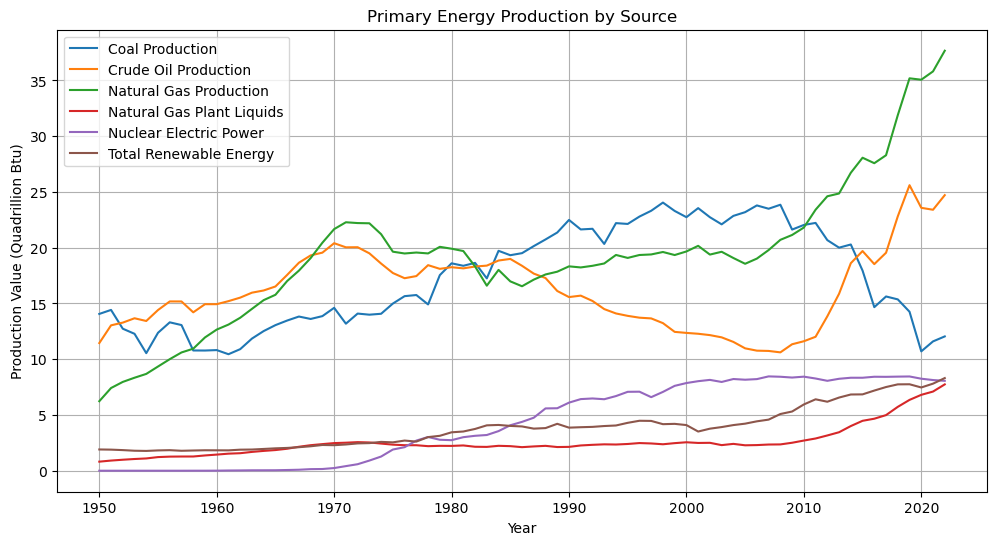

In [168]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
coal_production_row = transposed_df[(transposed_df.index == 0) & (transposed_df['Description'] == 'Coal Production')]
crude_oil_production_row = transposed_df[(transposed_df.index == 1) & (transposed_df['Description'] == 'Crude Oil Production')]
natural_gas_production_row = transposed_df[(transposed_df.index == 2) & (transposed_df['Description'] == 'Natural Gas (Dry) Production')]
natural_gas_liquids_row = transposed_df[(transposed_df.index == 3) & (transposed_df['Description'] == 'Natural Gas Plant Liquids Production')]
nuclear_power_row = transposed_df[(transposed_df.index == 4) & (transposed_df['Description'] == 'Nuclear Electric Power Production')]
renewable_energy_row = transposed_df[(transposed_df.index == 5) & (transposed_df['Description'] == 'Total Renewable Energy Production')]

# Extract the years and values for each production type
years = coal_production_row.columns[2:].astype(int)
coal_values = coal_production_row.values[:, 2:].flatten().astype(float)
crude_oil_values = crude_oil_production_row.values[:, 2:].flatten().astype(float)
natural_gas_values = natural_gas_production_row.values[:, 2:].flatten().astype(float)
natural_gas_liquids_values = natural_gas_liquids_row.values[:, 2:].flatten().astype(float)
nuclear_power_values = nuclear_power_row.values[:, 2:].flatten().astype(float)
renewable_energy_values = renewable_energy_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, coal_values, linestyle='-', label='Coal Production')
plt.plot(years, crude_oil_values, linestyle='-', label='Crude Oil Production')
plt.plot(years, natural_gas_values, linestyle='-', label='Natural Gas Production')
plt.plot(years, natural_gas_liquids_values, linestyle='-', label='Natural Gas Plant Liquids')
plt.plot(years, nuclear_power_values, linestyle='-', label='Nuclear Electric Power')
plt.plot(years, renewable_energy_values, linestyle='-', label='Total Renewable Energy')
plt.title("Primary Energy Production by Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()
plt.show()
